# AIR PASSENGERS TIME SERIES

## 1. Loading

In [1]:
# importing required libs.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading data set
path = "D:/PYTHON VIDEOS AND PRACTICE/practice/air/AirPassengers.csv"
data = pd.read_csv(path)

In [3]:
print(data.head())
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


***In order to read the data as a time series, we have to pass arguments to the read_csv command:***

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [5]:
data = pd.read_csv(path, index_col='Month', date_parser=dateparse, parse_dates=['Month'])

In [6]:
print('Parsed Data:')
print(data.head())

Parsed Data:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [7]:
#cross-checking datatype of index
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

***Convertind DF into Series to prevent referring to column names everytime i use TS.***

In [8]:
ts = data["#Passengers"]
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [9]:
print(ts['1949-01-01'])
print('\n', ts['1945-01-01':'1949-05-01'])
print('\n', ts[:5])
print('\n', ts['1949'])

112

 Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

 Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

 Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64


# 2. Analyzing the Times Series(TS)

## *Checking Stationarity*
 TS is staionary if mean, variance, autocovariance remain **constant over time**

C:\Users\manis\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


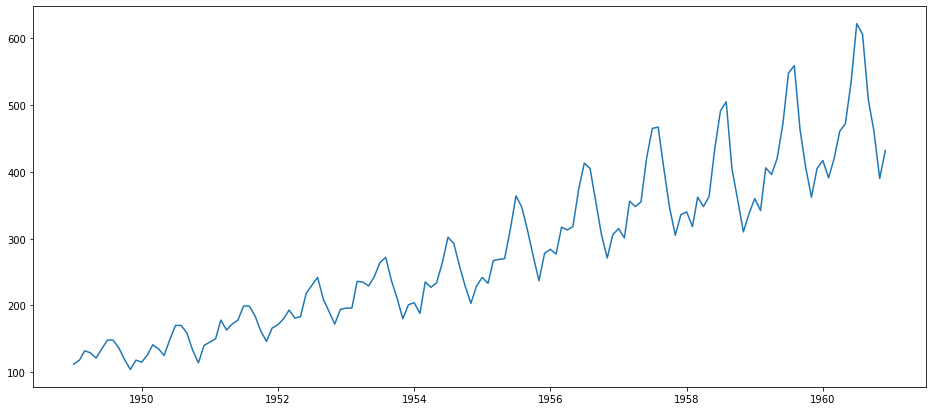

In [10]:
plt.figure(figsize=[16,7])
plt.plot(ts)

There is an **overall icreasing trend** along with some **seasonal variations**. However it might not always be possible to make such visual inferences. So, more formally, we check stionarity using the following:
1. **Plotting Rolling Statistics**: plot of moving avg/var with time.But, again it's more of a visual technique.
2. **Dickey-Fuller Test**: Here null hypothesis is that TS in non-stationary. If **Test Statistic** is less than the **Critical Value**, null hypothesis is rejected and the series is stationary.

In [11]:
from statsmodels.tsa.stattools import adfuller

In [79]:
def test_stationarity(timeseries):
    
    #Perform rolling statistics
    plt.figure(figsize=[15,7])
    plt.title('Rolling Mean & Standard Deviation')
    original=timeseries.plot(color='b',label='Original')
    rolmean=timeseries.rolling(window=12).mean().plot(color='r',label='Rolling Mean')
    rolstd=timeseries.rolling(window=12).std().plot(color='g',label='Rolling Std')

    plt.legend(loc ='best')
    plt.show()
    
    #Perform Dickey-Fuller Test
    print('Results of Dickey-Fuller Test:')
    dftest=adfuller(timeseries)
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','No. of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print (dfoutput)

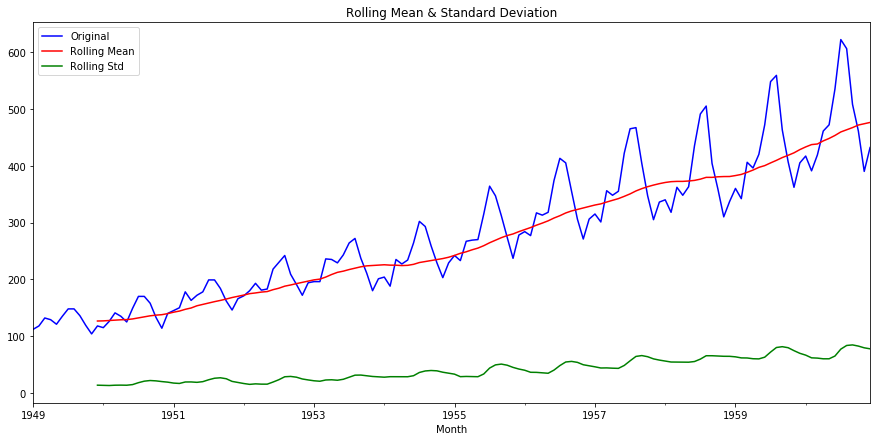

Results of Dickey-Fuller Test:
Test Statistic                0.815369
p-value                       0.991880
#Lags Used                   13.000000
No. of observations used    130.000000
Critical Value (1%)          -3.481682
Critical Value (5%)          -2.884042
Critical Value (10%)         -2.578770
dtype: float64


In [80]:
test_stationarity(ts)

# 3. REMOVING TREND AND SEASONALITY

## 3.1 *Estimating & Eliminating Trend*
-- doesn't works for high seasonality
#### Techniques:
- Aggregation: taking avg for a time period like monthly/weekly.
- Smoothing - taking rolling averages
- Polynomial Fitting - fit a regression model

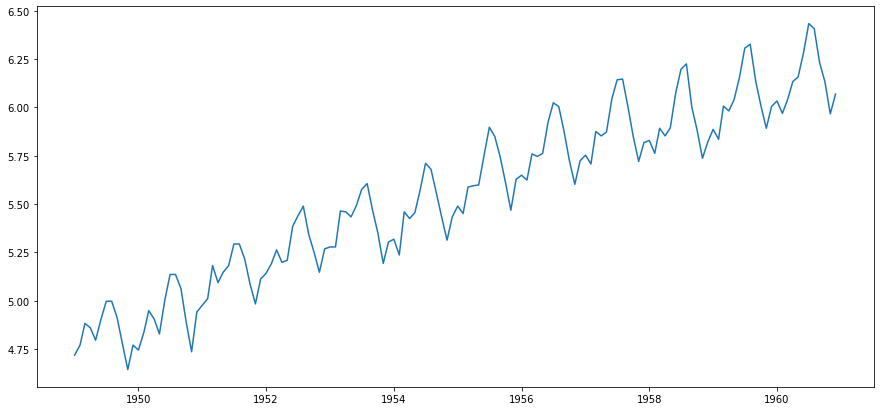

In [82]:
# Trasnsformation: penalize higher values more than smaller values.
ts_log = np.log(ts)
plt.figure(figsize=[15,7])
plt.plot(ts_log)

In [83]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64


- ***moving average***

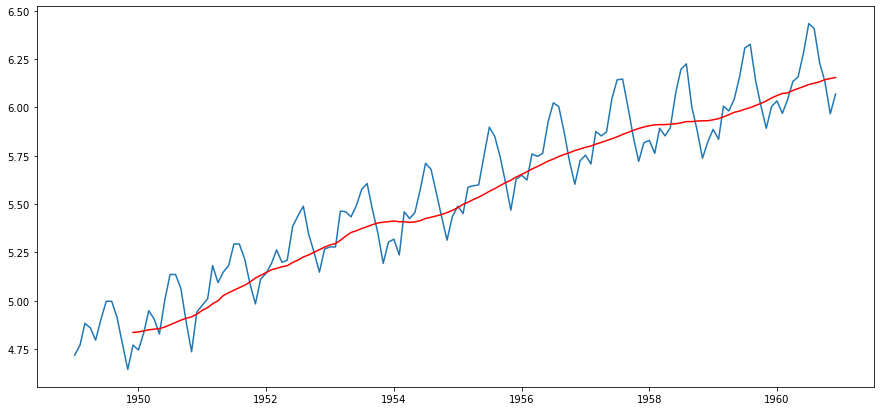

In [92]:
moving_avg = ts_log.rolling(12).mean()
plt.figure(figsize=(15,7))
plt.plot(ts_log)
plt.plot(moving_avg,color='r')

In [93]:
# Since we are taking avg. of last 12 values, rolling mean is not defined for first 11 values.
ts_log_moving_avg_diff= ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

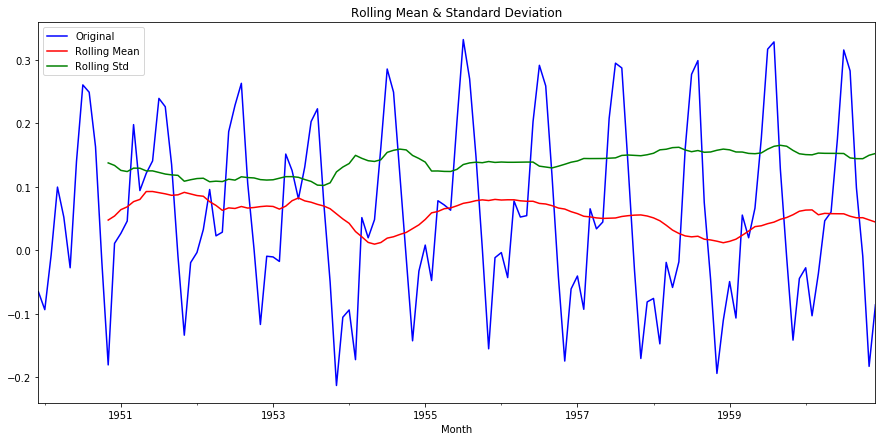

Results of Dickey-Fuller Test:
Test Statistic               -3.162908
p-value                       0.022235
#Lags Used                   13.000000
No. of observations used    119.000000
Critical Value (1%)          -3.486535
Critical Value (5%)          -2.886151
Critical Value (10%)         -2.579896
dtype: float64


In [94]:
# Let's drop NaN values and check for stationarity
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

*Much Better. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.*

*Note: Drawback in this approach is that time-period has to be strictly defined. But in cases like 'stock price', we take **weighted moving avg** where recent values are given higher weight. A popilar one is exponentially weighted moving avg where weights are assigned to all the previous values with a **decay factor**.*

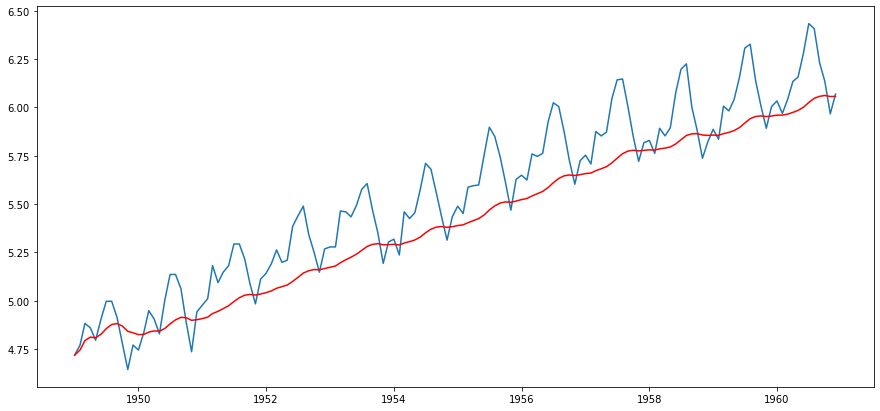

In [99]:
expweighted_mov_avg = ts_log.ewm(halflife = 12).mean()
plt.figure(figsize=(15,7))
plt.plot(ts_log)
plt.plot(expweighted_mov_avg, color='r')

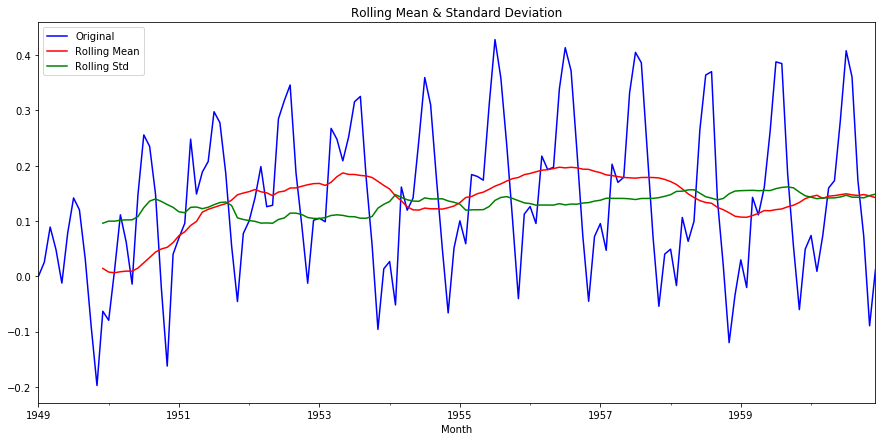

Results of Dickey-Fuller Test:
Test Statistic               -3.601262
p-value                       0.005737
#Lags Used                   13.000000
No. of observations used    130.000000
Critical Value (1%)          -3.481682
Critical Value (5%)          -2.884042
Critical Value (10%)         -2.578770
dtype: float64


In [100]:
ts_log_ewma_diff = ts_log - expweighted_mov_avg
test_stationarity(ts_log_ewma_diff)

**More Better** *This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.*

## 3.2 Eliminating Trend & Seasonality Both.
####        Techniques
- ***Differencing*** - take difference with a particular time lag.
- ***Decomposition*** - modeling both trend and seasonality sseparately and removing them from the model.

- ### Differencing

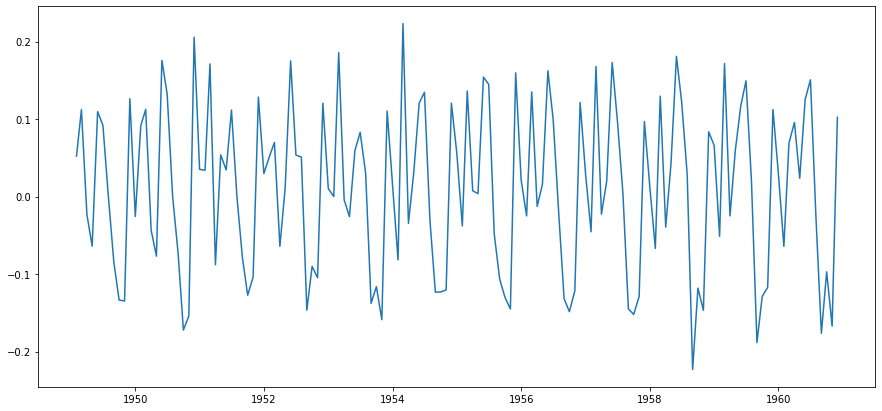

In [105]:
# First order differencing
ts_log_diff = ts_log - ts_log.shift()
plt.figure(figsize=(15,7))
plt.plot(ts_log_diff)

This appears to have reduced trend. Lets verify using plots:

In [107]:
ts_log_diff

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: #Passengers, Length: 144, dtype: float64

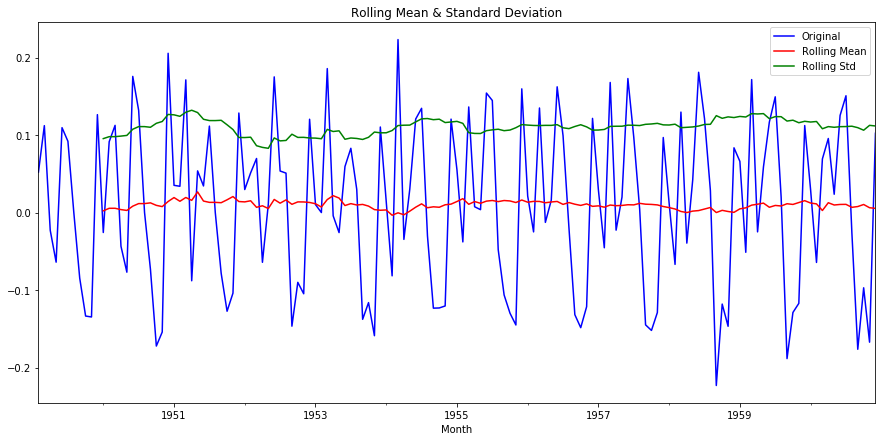

Results of Dickey-Fuller Test:
Test Statistic               -2.717131
p-value                       0.071121
#Lags Used                   14.000000
No. of observations used    128.000000
Critical Value (1%)          -3.482501
Critical Value (5%)          -2.884398
Critical Value (10%)         -2.578960
dtype: float64


In [108]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is **less than the 10% critical value**, thus the TS is stationary with 90% confidence. We can also take second or third order differences which might get even better results in certain applications.

- ### Decomposing
*In this approach, both trend and seasonality are modeled separately and the remaining part i.e, residual is returned.*

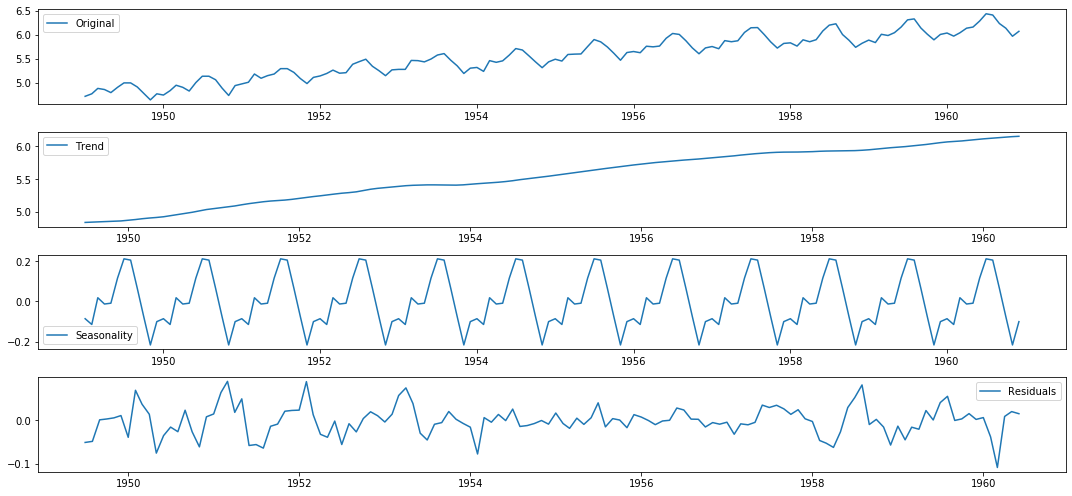

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15,7))
plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

*Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:*

In [121]:
residual.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01   -0.050884
1949-08-01   -0.048415
1949-09-01    0.001223
1949-10-01    0.003156
1949-11-01    0.005749
1949-12-01    0.011045
Name: #Passengers, dtype: float64

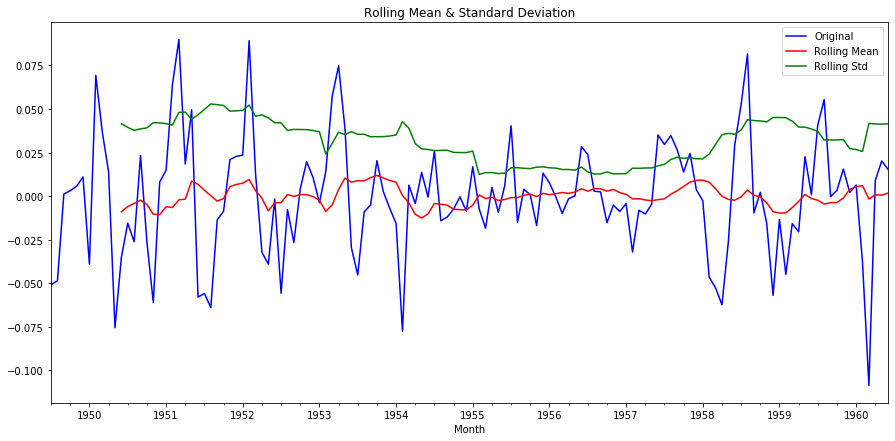

Results of Dickey-Fuller Test:
Test Statistic             -6.332387e+00
p-value                     2.885059e-08
#Lags Used                  9.000000e+00
No. of observations used    1.220000e+02
Critical Value (1%)        -3.485122e+00
Critical Value (5%)        -2.885538e+00
Critical Value (10%)       -2.579569e+00
dtype: float64


In [113]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary. Maybe Advanced decomposition techniques can generate better results. **Also, Note that converting the residuals into original values for future data in not very intuitive in this case.**

# 4. FORECASTING TIME SERIES

## 4.1 ARIMA

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

- **Number of AR (Auto-Regressive) terms (p)**: AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
- **Number of MA (Moving Average) terms (q)**: MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
- **Number of Differences (d)**: These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

**Autocorrelation Function (ACF)**: It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

**Partial Autocorrelation Function (PACF)**: This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

The ACF and PACF plots for the TS after differencing can be plotted as:

In [122]:
from statsmodels.tsa.stattools import acf,pacf

In [123]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

C:\Users\manis\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

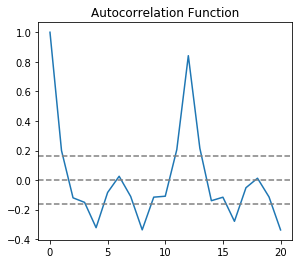

In [127]:
#Plot ACF:
plt.figure(figsize=(10,4))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

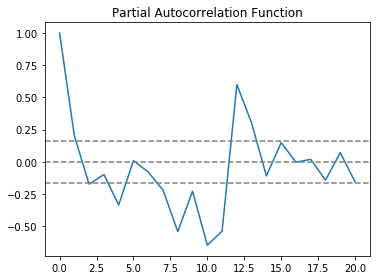

In [128]:
#Plot PACF:
plt.figure(figsize=(10,4))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

**p –** The lag value where the **PACF** chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.

**q –** The lag value where the **ACF** chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

Now, lets make 3 different ARIMA models considering individual as well as combined effects. And get RSS for each. Note that here RSS is for the values of residuals and not actual series.

In [129]:
# Loading ARIMA model
from statsmodels.tsa.arima_model import ARIMA

### AR Model

C:\Users\manis\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\manis\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

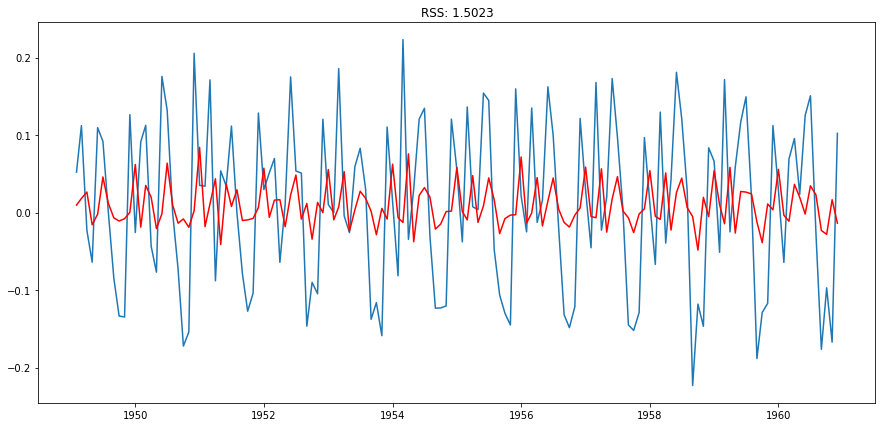

In [131]:
model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit(disp=-1)

plt.figure(figsize=(15,7))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

C:\Users\manis\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\manis\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

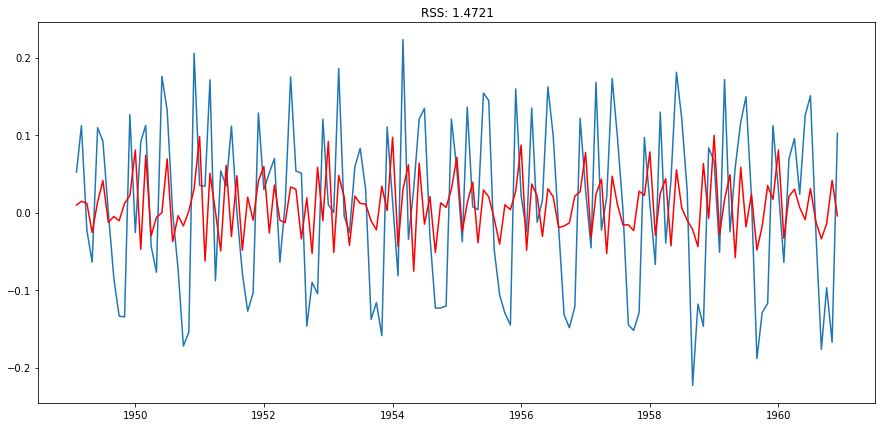

In [133]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  

plt.figure(figsize=(15,7))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### Combined Model

C:\Users\manis\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\manis\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

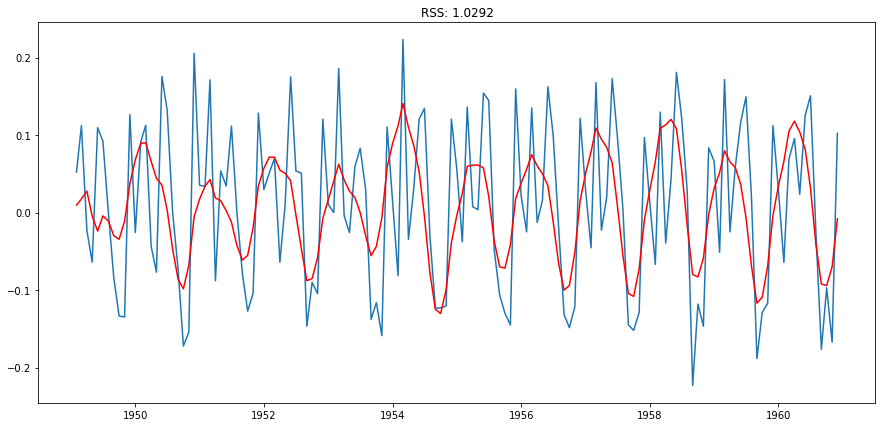

In [134]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(15,7))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

Here we can see that the AR and MA models have almost the same RSS but combined is significantly better. Now, we are left with 1 last step, i.e. taking these values back to the original scale.

## 4.2 Taking it Back to the Original Scale

In [136]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


Notice that these start from ‘1949-02-01’ and not the first month. Why? This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. The cumulative sum can be found as:

In [138]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


Next we’ve to add them to base number. For this lets create a series with all values as base number and add the differences to it. This can be done as:

In [139]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\manis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Here the first element is base number itself and from thereon the values cumulatively added. Last step is to take the exponent and compare with the original series.

Text(0.5, 1.0, 'RMSE: 90.1044')

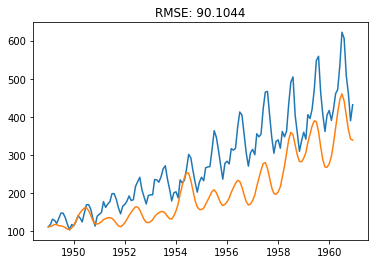

In [140]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))